In [5]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/comentarios.csv")

# Usamos solo la columna de comentarios
comentarios = df["texto_comentario"].values
print("Ejemplos de comentarios:\n", comentarios[:3])

Ejemplos de comentarios:
 ['El Smartphone Nexus 5G es un cambio de juego. La pantalla OLED es vívida, la cámara de 108MP captura detalles impresionantes incluso en condiciones de baja luminosidad, y el procesador ultrarrápido hace que todo se sienta increíblemente fluido. La duración de la batería es asombrosa, superando fácilmente mis días más largos de uso intensivo con navegación, redes sociales y juegos. La carga rápida de 65W es un salvavidas cuando necesito un impulso rápido de energía.'
 'La Camiseta Deportiva Ultralight es muy cómoda para mis entrenamientos matutinos. El material es ligero y transpirable, se siente muy bien en la piel. Sin embargo, la talla L es un poco más ajustada de lo que esperaba en los hombros. Aún así, es un gran producto para el gimnasio y se seca rápidamente después de sudar, lo que evita esa sensación de humedad tan desagradable.'
 'La Laptop Gamer Pro es una bestia de rendimiento. Ha superado todas mis expectativas en juegos y edición de video. Con e

In [6]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 7.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [7]:
nlp = spacy.load("es_core_news_sm")
def preprocesar(texto):
    doc = nlp(texto.lower())
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens)

comentarios_pre = [preprocesar(c) for c in comentarios]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(comentarios_pre)

print("Shape:", X.shape)  # (n_comentarios, vocabulario)
print("Matriz dispersa (primeros 3 comentarios):\n", X.toarray()[:3])

print("\nVocabulario:", vectorizer.get_feature_names_out())

Shape: (620, 758)
Matriz dispersa (primeros 3 comentarios):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vocabulario: ['abrir' 'absoluto' 'absorbente' 'absorber' 'acabado' 'acción' 'acero'
 'acolchado' 'acontecimiento' 'adaptar' 'adecuado' 'adición' 'adictivo'
 'aficionado' 'agarre' 'agotar' 'agradable' 'agua' 'aguantar' 'agudo'
 'aire' 'aislante' 'ajustabl' 'ajustado' 'ajustar' 'alimento'
 'almohadilla' 'altavoz' 'alto' 'amante' 'ambiente' 'amigo' 'amir'
 'amortiguar' 'amplio' 'animación' 'antiadherente' 'apagado' 'apagar'
 'aparecer' 'aparte' 'aplicación' 'apretar' 'archivo' 'arco' 'armario'
 'arrepientir' 'arrugar' 'arruinar' 'asa' 'asiento' 'asombroso' 'aspecto'
 'atractivo' 'audio' 'auricular' 'autonomía' 'autor' 'auténtico' 'avanza'
 'aventura' 'ayuda' 'ayudar' 'año' 'bajo' 'balón' 'barato' 'base'
 'batería' 'bestia' 'bestial' 'bicicleta' 'bloatware' 'bloquear'
 'bluetooth' 'bolsillo' 'bonito' 'borde' 'borrar' 'borroso' 'brillante'
 'buceo' 'busca' 'buscar' 'básico

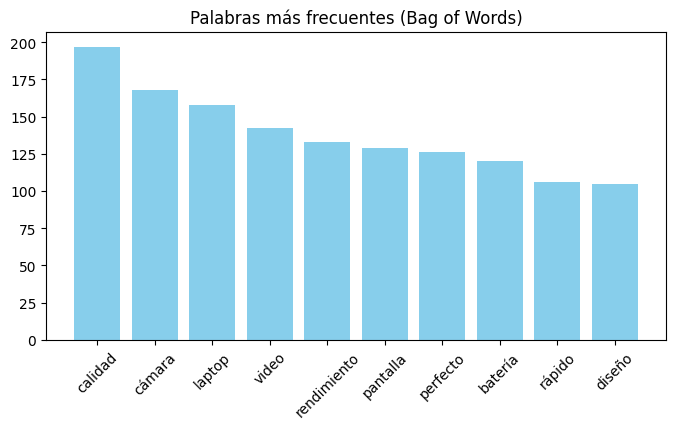

In [8]:
word_counts = np.asarray(X.sum(axis=0)).ravel()
vocab = vectorizer.get_feature_names_out()

# Ordenar por frecuencia
sorted_idx = word_counts.argsort()[::-1]
top_words = vocab[sorted_idx][:10]
top_counts = word_counts[sorted_idx][:10]

plt.figure(figsize=(8,4))
plt.bar(top_words, top_counts, color="skyblue")
plt.title("Palabras más frecuentes (Bag of Words)")
plt.xticks(rotation=45)
plt.show()